In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)

from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import mglearn

In [2]:
# mglearn 설치
# !pip install mglearn

### 데이터는 반드시 행렬로 줘야한다.
- 행: 데이터의 개수
- 열: 특성 데이터의 개수
- 단일 선형 회귀: 특성 데이터의 개수가 한 개 

In [3]:
# 특성 데이터 
x_data = np.array(range(1, 10))
# 라벨 데이터
y_data = np.array(range(1, 10))

x_data, y_data

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [4]:
# n x 1 형태로 변환
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

x_data.shape, y_data.shape

((9, 1), (9, 1))

In [5]:
# 선형 회귀 학습
model = LinearRegression()
model.fit(x_data, y_data)

LinearRegression()

In [6]:
# w값(weight, 선형 회귀 기울기)
model.coef_

array([[1.]])

In [7]:
# b값(bias, 절편)
model.intercept_

array([-8.8817842e-16])

In [8]:
# 예측값
y_pred = model.predict(x_data)
y_pred

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [9]:
# score
# r2 score를 반환한다
model.score(x_data, y_data)

1.0

### r2 score
- 회귀 모델의 검증을 위한 지표로 결정계수(coefficient of determination, r2)사용
- 독립변수가 종속변수에 대해 얼마만큼의 설명력을 가지게 되는지를 나타내는 수치, 수치가 아주 낮다면 가설이 채택된다고 하더라도 설명력이 낮기 때문에 가설의 채택이 무의미하게 되어질 가능성이 높아진다
- 0과 1 사이의 값으로 나타나는데, 0에 가까울수록 설명력이 낮고, 1에 가까울수록 높다고 해석할 수 있다.
- $ SSR( 예측값- 평균값)^2 의합 $
- $ SST( 실제값- 평균값)^2 의합 $
- $ SSE( 실제값- 예측값)^2 의합 $
- $ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST} $

In [10]:
r2_score(y_data, y_pred)

1.0

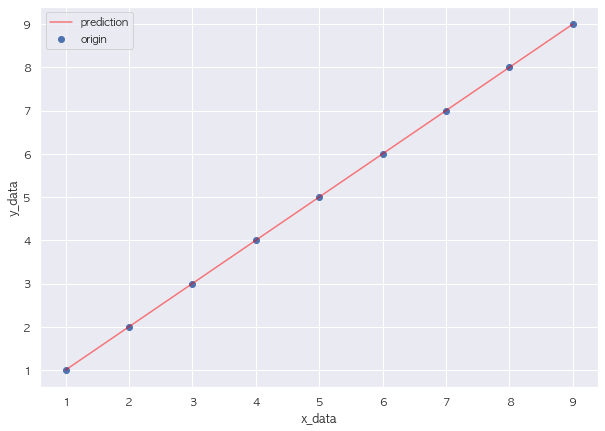

In [11]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='origin')
# 예측값
plt.plot(x_data, y_pred, label='prediction', c='red', alpha=0.5)
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()
plt.show()

### 자동차 속도에 따른 제동거리 예측

In [12]:
car_df = pd.read_csv('data/cars.csv')
car_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [13]:
# 특성 데이터
x_data = car_df[['speed']]
# 라벨 데이터
y_data = car_df[['dist']]

x_data.shape, y_data.shape

((50, 1), (50, 1))

In [14]:
# 선형 회귀 학습
model_car = LinearRegression()
model_car.fit(x_data, y_data)

LinearRegression()

In [15]:
# w값
model_car.coef_

array([[3.93240876]])

In [16]:
# bias값
model_car.intercept_

array([-17.57909489])

In [17]:
# score값
model_car.score(x_data, y_data)

0.6510793807582509

In [18]:
# 예측
y_pred = model_car.predict(x_data)
y_pred

array([[-1.84945985],
       [-1.84945985],
       [ 9.94776642],
       [ 9.94776642],
       [13.88017518],
       [17.81258394],
       [21.7449927 ],
       [21.7449927 ],
       [21.7449927 ],
       [25.67740146],
       [25.67740146],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [41.4070365 ],
       [41.4070365 ],
       [41.4070365 ],
       [45.33944526],
       [45.33944526],
       [49.27185401],
       [49.27185401],
       [49.27185401],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [57.13667153],
       [57.13667153],
       [57.13667153],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [68.93389781],
       [72.86630657],
       [76

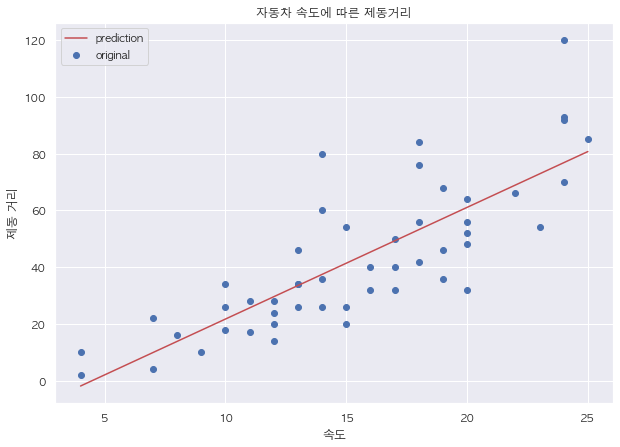

In [19]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='original')
# 예측값
plt.plot(x_data, y_pred, c='r', label='prediction')
plt.xlabel('속도')
plt.ylabel('제동 거리')
plt.title('자동차 속도에 따른 제동거리')
plt.legend()
plt.show()

mean square error의 합이 가장 작은 예측선을 긋는다

In [20]:
# 자동차 속도가 15일 때 제동 거리 예측
# 내부에서 행렬곱을 수행하므로 입력을 행렬로 줘야한다
model_car.predict( [[15]] )

array([[41.4070365]])

In [21]:
# 계산값 y = w*x + b
model_car.coef_[0][0] * 15 + model_car.intercept_[0]

41.40703649635036

In [22]:
# 자동차 속도가 13, 15일 때 제동 거리 예측
model_car.predict( np.array([[13, 15]]).reshape(-1, 1) )

array([[33.54221898],
       [41.4070365 ]])

### 전기 생산량에 대한 전기 사용량 예측

In [23]:
electric_df = pd.read_csv('data/electric.csv', usecols=['전기생산량', '전기사용량'])
electric_df.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [24]:
# 특성 데이터
x_data = electric_df[['전기생산량']]
y_data = electric_df['전기사용량']

x_data.shape, y_data.shape

((12, 1), (12,))

In [25]:
# 학습
model_electric = LinearRegression()
model_electric.fit(x_data, y_data)

LinearRegression()

In [26]:
# w, b값
model_electric.coef_[0], model_electric.intercept_

(0.4956032360182904, 0.919581428068942)

In [27]:
# score값
model_electric.score(x_data, y_data)

0.7973123992441478

In [28]:
# 예측값
y_pred_linear = model_electric.predict(x_data)
y_pred_linear

array([2.66410482, 2.19823778, 2.56002814, 2.9366866 , 3.20926838,
       2.89208231, 3.04571931, 3.31334506, 2.75826943, 3.20431235,
       2.85243405, 2.50551178])

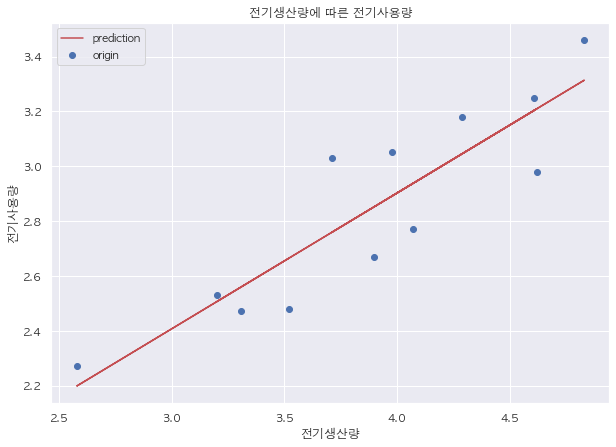

In [29]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='origin')
# 예측값
plt.plot(x_data, y_pred_linear, c='r', label='prediction')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.title('전기생산량에 따른 전기사용량')
plt.legend()
plt.show()

In [30]:
r2_score(y_data, y_pred_linear)

0.7973123992441478

### 학습을 통한 선형 회귀
- SGDRegressor(SGD, Stochastic Gradient Descent, 확률적 경사하강법)
    - 매 스텝(step)에서 딱 1개의 샘플을 무작위로 선택하고 그에 대한 gradient를 계산한다.

In [31]:
# 파라미터 설정
model_SGD = SGDRegressor(max_iter=100, alpha=0.0004, early_stopping=True, verbose=1)
# max_iter: 학습 횟수
# alpha: 학습률(learning rate)
# early_stopping: cost값이 변화가 없으면 그만 학습할 것인가
# verbose: 학습 과정을 보여줄 것인가

# 학습
model_SGD.fit(x_data, y_data)

-- Epoch 1
Norm: 0.49, NNZs: 1, Bias: 0.120390, T: 10, Avg. loss: 1.288231
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 1, Bias: 0.150078, T: 20, Avg. loss: 0.157409
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.161468, T: 30, Avg. loss: 0.045315
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.67, NNZs: 1, Bias: 0.167798, T: 40, Avg. loss: 0.024358
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.67, NNZs: 1, Bias: 0.170661, T: 50, Avg. loss: 0.019922
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.68, NNZs: 1, Bias: 0.173210, T: 60, Avg. loss: 0.018496
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.68, NNZs: 1, Bias: 0.173912, T: 70, Avg. loss: 0.018494
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 0.68, NNZs: 1, Bias: 0.175357, T: 80, Avg. loss: 0.018370
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 0.68, NNZs: 1, Bias: 0.176004, T: 90, Avg. loss: 0.018455
Total training time: 0.05 seconds.
-- Epoch 1

SGDRegressor(alpha=0.0004, early_stopping=True, max_iter=100, verbose=1)

In [32]:
# w, b값
model_SGD.coef_, model_SGD.intercept_

(array([0.6830683]), array([0.17712475]))

In [33]:
# score값
model_SGD.score(x_data, y_data)

0.6816198099272766

In [34]:
# 예측값
y_pred_SGD = model_SGD.predict(x_data)
y_pred_SGD

array([2.58152516, 1.93944096, 2.43808082, 2.95721273, 3.33290029,
       2.89573658, 3.10748775, 3.47634464, 2.71130814, 3.32606961,
       2.84109112, 2.36294331])

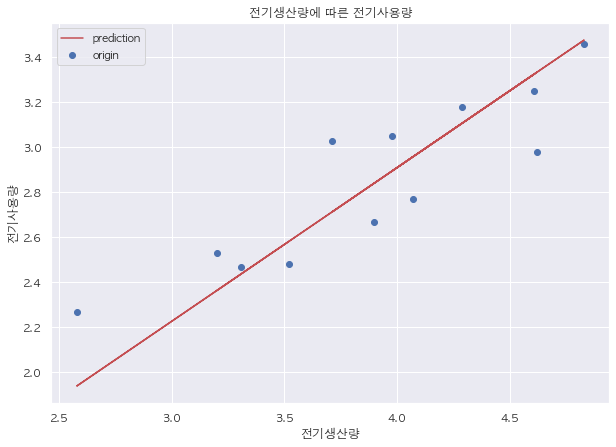

In [35]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='origin')
# 예측값
plt.plot(x_data, y_pred_SGD, c='r', label='prediction')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.title('전기생산량에 따른 전기사용량')
plt.legend()
plt.show()

### 딥러닝을 이용한 선형 회귀
- MLPRegressor(MLP, Multilayer Perceptron, 다층 퍼셉트론)
    - Perceptron 이란 neuron을 구성하는 하나의 단위를 의미
    - Multilayer perceptron, MLP는 이 perceptron을 여러 겹 쌓아놓은 형태의 모델
    - 입력과 출력층에 한 개 이상의 완전 연결 은닉층(hidden layer)를 추가하고, 각 은닉층(hidden layer)의 결과에 활성화 함수(activation function)를 적용
    - 일반적으로 사용되는 활성화 함수(activation function)는 ReLU 함수, Sigmoid 함수, Tanh 함수가 있다


In [46]:
model_NN = MLPRegressor(max_iter=5000, alpha=0.1, hidden_layer_sizes=(100, 10, 3), verbose=1)
# hidden_layer_sizes: 크기, 출력 개수, 히든레이어 개수

model_NN.fit(x_data, y_data)

Iteration 1, loss = 7.54567321
Iteration 2, loss = 7.16942057
Iteration 3, loss = 6.75899275
Iteration 4, loss = 6.62322153
Iteration 5, loss = 6.47560174
Iteration 6, loss = 6.31960650
Iteration 7, loss = 6.15851514
Iteration 8, loss = 5.99534650
Iteration 9, loss = 5.83185571
Iteration 10, loss = 5.66698054
Iteration 11, loss = 5.50142779
Iteration 12, loss = 5.33563729
Iteration 13, loss = 5.16983041
Iteration 14, loss = 5.02025429
Iteration 15, loss = 4.94205838
Iteration 16, loss = 4.86216363
Iteration 17, loss = 4.78078986
Iteration 18, loss = 4.69809241
Iteration 19, loss = 4.61423004
Iteration 20, loss = 4.52930107
Iteration 21, loss = 4.44342778
Iteration 22, loss = 4.35669087
Iteration 23, loss = 4.26915969
Iteration 24, loss = 4.18092831
Iteration 25, loss = 4.09208630
Iteration 26, loss = 4.00267185
Iteration 27, loss = 3.91274814
Iteration 28, loss = 3.82243339
Iteration 29, loss = 3.73173747
Iteration 30, loss = 3.64071625
Iteration 31, loss = 3.54950248
Iteration 32, los

MLPRegressor(alpha=0.1, hidden_layer_sizes=(100, 10, 3), max_iter=5000,
             verbose=1)

In [47]:
# w 값
model_NN.coefs_

[array([[ 3.96304045e-04,  2.29847541e-01,  1.53432062e-04,
         -5.60931865e-03, -3.47420043e-02,  1.83963617e-01,
          4.22145420e-02,  2.40098830e-04,  6.59020403e-02,
          2.03994368e-02,  1.42151619e-01, -7.86675440e-02,
          9.11255625e-06, -1.28310972e-01,  2.92908894e-01,
         -1.34367690e-01, -7.76776976e-02, -9.88262216e-02,
          1.68600084e-01,  9.03159195e-02,  1.46023594e-01,
         -8.93776505e-03,  4.17798151e-02,  2.76205851e-01,
         -1.85496424e-02, -7.32131247e-02,  6.96302624e-02,
          5.18651881e-02,  1.16368718e-02,  9.55394508e-02,
         -6.58876594e-02, -5.85467079e-05, -3.03332865e-02,
          1.05909522e-01,  5.99344913e-02, -1.09421076e-01,
          1.18712515e-01,  2.24421887e-01,  5.17119813e-02,
         -9.34328032e-02,  1.77656940e-05, -1.36226520e-01,
         -7.92062410e-02, -3.52657660e-02, -9.24727936e-04,
          1.84844772e-01, -2.18698966e-02, -1.38610330e-01,
          3.20077436e-01,  2.73969707e-0

In [48]:
# b 값
model_NN.intercepts_

[array([ 0.18241584,  0.25538723, -0.24204273, -0.00707178,  0.15956875,
         0.11487215, -0.23305011, -0.16661711,  0.16522158, -0.11228445,
         0.20512037, -0.00959764, -0.22621464,  0.00191506, -0.16530496,
        -0.09844054,  0.01722299, -0.03138709,  0.17981205, -0.05307224,
        -0.05622792,  0.01634027,  0.07487576,  0.25825715,  0.20022525,
         0.12976446,  0.0816023 ,  0.13527559,  0.23478117, -0.21493939,
        -0.23867494, -0.16345764, -0.21912232,  0.12043395, -0.08922259,
        -0.15635492,  0.04231982, -0.06537755,  0.13526733,  0.16271597,
        -0.09339121, -0.09422131,  0.17156917,  0.10060099, -0.10474072,
         0.03745101,  0.04254634,  0.1334285 ,  0.25955935,  0.00242037,
        -0.05762902, -0.03179006,  0.07408048,  0.08673592,  0.22425578,
         0.17711314,  0.08938947,  0.21712574,  0.0180298 ,  0.26705765,
         0.22137571,  0.08493399, -0.19840825,  0.20146798, -0.05928716,
        -0.05187769, -0.00525153,  0.13637039,  0.0

In [49]:
# score
model_NN.score(x_data, y_data)

0.5164854725816013

In [50]:
# 예측값
y_pred_NN = model_NN.predict(x_data)
y_pred_NN

array([2.6367995 , 1.91604106, 2.47569408, 3.05874226, 3.48070101,
       2.98969708, 3.22751937, 3.64193062, 2.78256154, 3.47302341,
       2.92832359, 2.39130553])

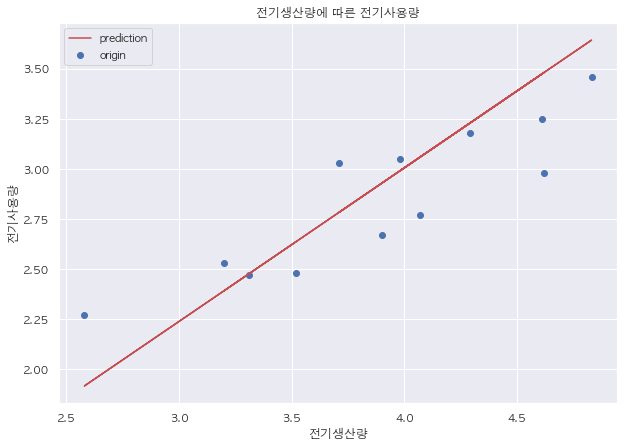

In [51]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='origin')
# 예측값
plt.plot(x_data, y_pred_NN, c='r', label='prediction')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.title('전기생산량에 따른 전기사용량')
plt.legend()
plt.show()

### 각 모델 비교

In [52]:
print('Linear score: ', r2_score(y_data, y_pred_linear))
print('SGD score: ', r2_score(y_data, y_pred_SGD))
print('MLP score: ', r2_score(y_data, y_pred_NN))

Linear score:  0.7973123992441478
SGD score:  0.6816198099272766
MLP score:  0.5164854725816013


하이퍼 파라미터를 튜닝하지 않았기 때문에 linear 모델의 성능이 가장 좋게 나온다

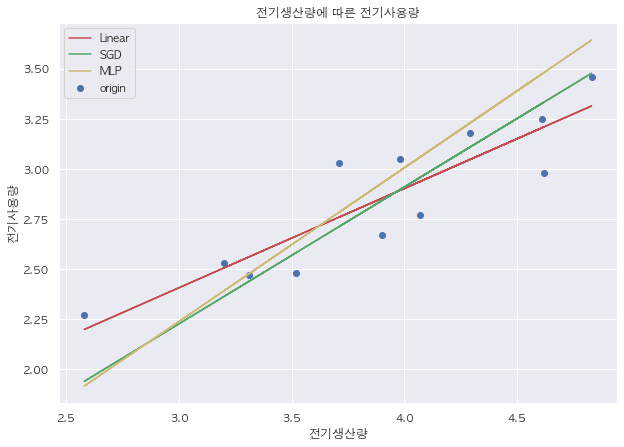

In [54]:
# 시각화
# 실제값
plt.scatter(x_data, y_data, label='origin')
# 예측값
plt.plot(x_data, y_pred_linear, c='r', label='Linear')
plt.plot(x_data, y_pred_SGD, c='g', label='SGD')
plt.plot(x_data, y_pred_NN, c='y', label='MLP')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.title('전기생산량에 따른 전기사용량')
plt.legend()
plt.show()

### 자동차 속도에 따른 제동거리 예측 - MLP

In [63]:
model_NN = MLPRegressor(max_iter=5000, alpha=0.1, hidden_layer_sizes=(100, ), verbose=1)
# hidden_layer_sizes: 크기, 출력 개수, 히든레이어 개수

model_NN.fit(car_df[['speed']], car_df['dist'])

Iteration 1, loss = 1422.50828503
Iteration 2, loss = 1410.28017428
Iteration 3, loss = 1398.12629594
Iteration 4, loss = 1386.04761573
Iteration 5, loss = 1374.04490480
Iteration 6, loss = 1362.11871928
Iteration 7, loss = 1350.26931349
Iteration 8, loss = 1338.49644760
Iteration 9, loss = 1326.79926740
Iteration 10, loss = 1315.17931930
Iteration 11, loss = 1303.66734854
Iteration 12, loss = 1292.24238441
Iteration 13, loss = 1280.91969432
Iteration 14, loss = 1269.73109814
Iteration 15, loss = 1258.68998958
Iteration 16, loss = 1247.73901122
Iteration 17, loss = 1236.88199712
Iteration 18, loss = 1226.10771336
Iteration 19, loss = 1215.41750466
Iteration 20, loss = 1204.80169202
Iteration 21, loss = 1194.25322426
Iteration 22, loss = 1183.76942265
Iteration 23, loss = 1173.35223649
Iteration 24, loss = 1162.99732821
Iteration 25, loss = 1152.70403102
Iteration 26, loss = 1142.46808079
Iteration 27, loss = 1132.29124688
Iteration 28, loss = 1122.17057970
Iteration 29, loss = 1112.104

Iteration 268, loss = 133.54678195
Iteration 269, loss = 133.52801714
Iteration 270, loss = 133.50903274
Iteration 271, loss = 133.49008727
Iteration 272, loss = 133.47091287
Iteration 273, loss = 133.45168094
Iteration 274, loss = 133.43247933
Iteration 275, loss = 133.41327614
Iteration 276, loss = 133.39392090
Iteration 277, loss = 133.37446358
Iteration 278, loss = 133.35524936
Iteration 279, loss = 133.33663595
Iteration 280, loss = 133.31564907
Iteration 281, loss = 133.29633011
Iteration 282, loss = 133.27715707
Iteration 283, loss = 133.25761108
Iteration 284, loss = 133.23770935
Iteration 285, loss = 133.21768132
Iteration 286, loss = 133.19754459
Iteration 287, loss = 133.17731275
Iteration 288, loss = 133.15695464
Iteration 289, loss = 133.13635123
Iteration 290, loss = 133.11554276
Iteration 291, loss = 133.09463551
Iteration 292, loss = 133.07383441
Iteration 293, loss = 133.05282420
Iteration 294, loss = 133.03157475
Iteration 295, loss = 133.01320428
Iteration 296, loss 

Iteration 560, loss = 123.95389936
Iteration 561, loss = 123.91314540
Iteration 562, loss = 123.87074365
Iteration 563, loss = 123.82806219
Iteration 564, loss = 123.78500560
Iteration 565, loss = 123.74110547
Iteration 566, loss = 123.69668907
Iteration 567, loss = 123.65206720
Iteration 568, loss = 123.60761777
Iteration 569, loss = 123.56354431
Iteration 570, loss = 123.51870210
Iteration 571, loss = 123.47679837
Iteration 572, loss = 123.43344018
Iteration 573, loss = 123.38489724
Iteration 574, loss = 123.34303815
Iteration 575, loss = 123.30362529
Iteration 576, loss = 123.26227630
Iteration 577, loss = 123.22023996
Iteration 578, loss = 123.18763905
Iteration 579, loss = 123.13968223
Iteration 580, loss = 123.09407969
Iteration 581, loss = 123.05403935
Iteration 582, loss = 123.01378050
Iteration 583, loss = 122.97330514
Iteration 584, loss = 122.93127167
Iteration 585, loss = 122.88932405
Iteration 586, loss = 122.84538064
Iteration 587, loss = 122.80042007
Iteration 588, loss 

Iteration 926, loss = 114.39211212
Iteration 927, loss = 114.38260805
Iteration 928, loss = 114.37380188
Iteration 929, loss = 114.36382435
Iteration 930, loss = 114.35456892
Iteration 931, loss = 114.34622700
Iteration 932, loss = 114.33635056
Iteration 933, loss = 114.32735675
Iteration 934, loss = 114.31912561
Iteration 935, loss = 114.31009184
Iteration 936, loss = 114.30103144
Iteration 937, loss = 114.29299512
Iteration 938, loss = 114.28359086
Iteration 939, loss = 114.27466405
Iteration 940, loss = 114.26624377
Iteration 941, loss = 114.25858516
Iteration 942, loss = 114.24991860
Iteration 943, loss = 114.24106667
Iteration 944, loss = 114.23245867
Iteration 945, loss = 114.22326379
Iteration 946, loss = 114.21390447
Iteration 947, loss = 114.20671132
Iteration 948, loss = 114.19997598
Iteration 949, loss = 114.19600162
Iteration 950, loss = 114.18733306
Iteration 951, loss = 114.17937256
Iteration 952, loss = 114.17143859
Iteration 953, loss = 114.16304727
Iteration 954, loss 

Iteration 1195, loss = 112.99120538
Iteration 1196, loss = 112.98547408
Iteration 1197, loss = 112.98158442
Iteration 1198, loss = 112.97746447
Iteration 1199, loss = 112.97460216
Iteration 1200, loss = 112.96890470
Iteration 1201, loss = 112.96493792
Iteration 1202, loss = 112.96130577
Iteration 1203, loss = 112.95611566
Iteration 1204, loss = 112.95177453
Iteration 1205, loss = 112.94880248
Iteration 1206, loss = 112.94458484
Iteration 1207, loss = 112.94120996
Iteration 1208, loss = 112.93697128
Iteration 1209, loss = 112.93305833
Iteration 1210, loss = 112.93110937
Iteration 1211, loss = 112.92666816
Iteration 1212, loss = 112.92409476
Iteration 1213, loss = 112.92108433
Iteration 1214, loss = 112.91752425
Iteration 1215, loss = 112.91494104
Iteration 1216, loss = 112.91166038
Iteration 1217, loss = 112.90911700
Iteration 1218, loss = 112.90634971
Iteration 1219, loss = 112.90302969
Iteration 1220, loss = 112.89930910
Iteration 1221, loss = 112.89972468
Iteration 1222, loss = 112.8

Iteration 1469, loss = 112.31533079
Iteration 1470, loss = 112.31348485
Iteration 1471, loss = 112.31129558
Iteration 1472, loss = 112.31102402
Iteration 1473, loss = 112.30978458
Iteration 1474, loss = 112.30787144
Iteration 1475, loss = 112.30626702
Iteration 1476, loss = 112.30396536
Iteration 1477, loss = 112.30089162
Iteration 1478, loss = 112.30053459
Iteration 1479, loss = 112.29855044
Iteration 1480, loss = 112.29570182
Iteration 1481, loss = 112.29444655
Iteration 1482, loss = 112.29333925
Iteration 1483, loss = 112.29070813
Iteration 1484, loss = 112.28826401
Iteration 1485, loss = 112.28693431
Iteration 1486, loss = 112.28462699
Iteration 1487, loss = 112.28450187
Iteration 1488, loss = 112.28363669
Iteration 1489, loss = 112.28186454
Iteration 1490, loss = 112.28070561
Iteration 1491, loss = 112.27726172
Iteration 1492, loss = 112.27450235
Iteration 1493, loss = 112.27265285
Iteration 1494, loss = 112.27011897
Iteration 1495, loss = 112.26938289
Iteration 1496, loss = 112.2

Iteration 1821, loss = 111.55706420
Iteration 1822, loss = 111.55186363
Iteration 1823, loss = 111.55093934
Iteration 1824, loss = 111.55020945
Iteration 1825, loss = 111.54765581
Iteration 1826, loss = 111.54662720
Iteration 1827, loss = 111.54476482
Iteration 1828, loss = 111.54237335
Iteration 1829, loss = 111.54063265
Iteration 1830, loss = 111.53599188
Iteration 1831, loss = 111.53158976
Iteration 1832, loss = 111.53143322
Iteration 1833, loss = 111.53153167
Iteration 1834, loss = 111.53092337
Iteration 1835, loss = 111.52615690
Iteration 1836, loss = 111.52435938
Iteration 1837, loss = 111.52394806
Iteration 1838, loss = 111.52276750
Iteration 1839, loss = 111.51990006
Iteration 1840, loss = 111.51774460
Iteration 1841, loss = 111.51420016
Iteration 1842, loss = 111.51573925
Iteration 1843, loss = 111.51266786
Iteration 1844, loss = 111.50785725
Iteration 1845, loss = 111.51132472
Iteration 1846, loss = 111.51027239
Iteration 1847, loss = 111.50719996
Iteration 1848, loss = 111.5

Iteration 2110, loss = 111.12653515
Iteration 2111, loss = 111.12427765
Iteration 2112, loss = 111.12640953
Iteration 2113, loss = 111.12346287
Iteration 2114, loss = 111.12243361
Iteration 2115, loss = 111.12298328
Iteration 2116, loss = 111.12288633
Iteration 2117, loss = 111.12183059
Iteration 2118, loss = 111.11993687
Iteration 2119, loss = 111.11878240
Iteration 2120, loss = 111.11612382
Iteration 2121, loss = 111.11405272
Iteration 2122, loss = 111.11444500
Iteration 2123, loss = 111.11308010
Iteration 2124, loss = 111.11145666
Iteration 2125, loss = 111.11199303
Iteration 2126, loss = 111.11162429
Iteration 2127, loss = 111.11032139
Iteration 2128, loss = 111.10836895
Iteration 2129, loss = 111.10803886
Iteration 2130, loss = 111.10516189
Iteration 2131, loss = 111.10512611
Iteration 2132, loss = 111.10602114
Iteration 2133, loss = 111.10709451
Iteration 2134, loss = 111.10399107
Iteration 2135, loss = 111.10340012
Iteration 2136, loss = 111.10330390
Iteration 2137, loss = 111.1

Iteration 2415, loss = 110.89994345
Iteration 2416, loss = 110.89513923
Iteration 2417, loss = 110.89475605
Iteration 2418, loss = 110.89448527
Iteration 2419, loss = 110.89636091
Iteration 2420, loss = 110.89509762
Iteration 2421, loss = 110.89310872
Iteration 2422, loss = 110.89263866
Iteration 2423, loss = 110.89422698
Iteration 2424, loss = 110.89243004
Iteration 2425, loss = 110.89265175
Iteration 2426, loss = 110.89220032
Iteration 2427, loss = 110.89180236
Iteration 2428, loss = 110.89147945
Iteration 2429, loss = 110.89005192
Iteration 2430, loss = 110.89096615
Iteration 2431, loss = 110.89279016
Iteration 2432, loss = 110.89168107
Iteration 2433, loss = 110.88850766
Iteration 2434, loss = 110.88817724
Iteration 2435, loss = 110.88748399
Iteration 2436, loss = 110.89155197
Iteration 2437, loss = 110.88937369
Iteration 2438, loss = 110.88689313
Iteration 2439, loss = 110.88720265
Iteration 2440, loss = 110.88632101
Iteration 2441, loss = 110.88496201
Iteration 2442, loss = 110.8

Iteration 2732, loss = 110.79820997
Iteration 2733, loss = 110.80009335
Iteration 2734, loss = 110.79872156
Iteration 2735, loss = 110.79704150
Iteration 2736, loss = 110.79867467
Iteration 2737, loss = 110.79732721
Iteration 2738, loss = 110.79882851
Iteration 2739, loss = 110.79797449
Iteration 2740, loss = 110.79785581
Iteration 2741, loss = 110.79809241
Iteration 2742, loss = 110.79765570
Iteration 2743, loss = 110.79813162
Iteration 2744, loss = 110.79722303
Iteration 2745, loss = 110.79679798
Iteration 2746, loss = 110.79677745
Iteration 2747, loss = 110.79560349
Iteration 2748, loss = 110.79495866
Iteration 2749, loss = 110.79508023
Iteration 2750, loss = 110.79623664
Iteration 2751, loss = 110.79402282
Iteration 2752, loss = 110.79581775
Iteration 2753, loss = 110.79590905
Iteration 2754, loss = 110.79625797
Iteration 2755, loss = 110.79620055
Iteration 2756, loss = 110.79607292
Iteration 2757, loss = 110.79777824
Iteration 2758, loss = 110.79576487
Iteration 2759, loss = 110.7

MLPRegressor(alpha=0.1, max_iter=5000, verbose=1)

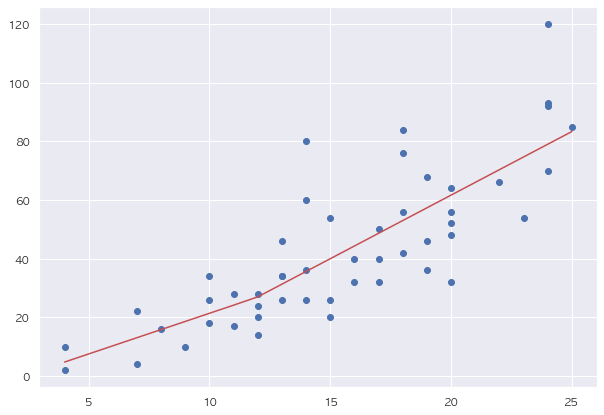

In [64]:
plt.scatter(car_df['speed'], car_df['dist'])
plt.plot(car_df['speed'], model_NN.predict(car_df[['speed']]), c='r')
plt.show()

앞서 살펴본 LinearRegressor, SGDRregressor에서는 하나의 직선으로 예측을 했지만 

MLP모델에서는 두개의 직선으로 예측을 했다 -> 데이터에 맞게 형태를 변경했다